<a href="https://colab.research.google.com/github/tamaratsilva/modeling_machine_learning/blob/main/Modeling_Pratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import numpy as np
from xgboost import XGBRegressor


In [2]:
#sep = separador do CSV
housing = pd.read_csv("/content/boston.csv", sep = ",")

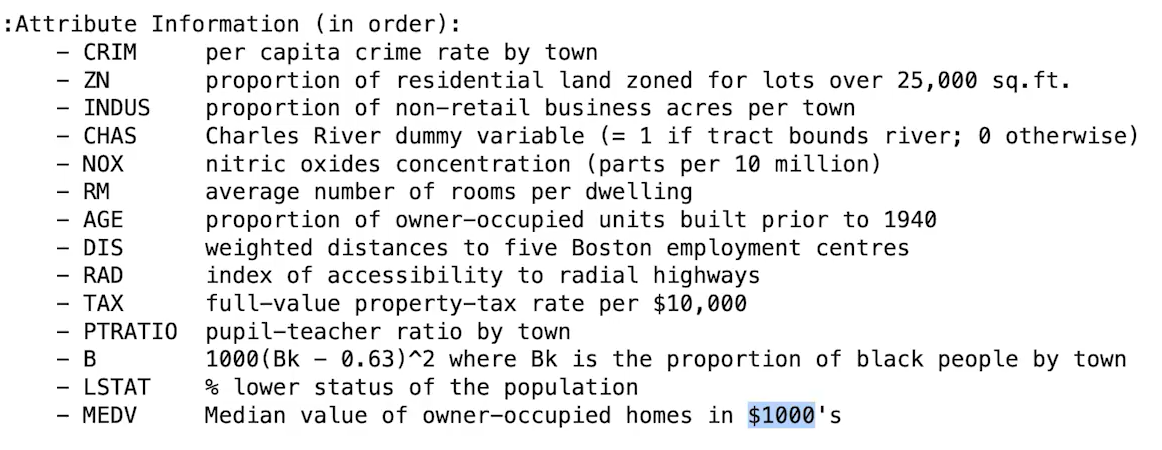

No caso o MEDV será usado como TARGET (x 1000 )

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
#SEPARAR O QUE SÃO AS VARIAVEIS EXPLICATIVAS /CARACTERISTICAS(X) E  A Y (target)
X=housing [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=housing [['MEDV']]

#MODELING TECHNIQUES - (definida pelo professor)

1- REGRESSÃO LINEAR DO SKLEARN <https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression>

2- Support Vector Regression do SKLEARN (SVR) <https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR>

3- Decision Tree Regression  do XGBoost <https://xgboost.readthedocs.io/en/stable/python/python_api.html> classxgboost.XGBRegressor

#Modeling Assumptions
Apenas variaveis numéricas



#TEST DESIGN

##Dataset Split

Separação de Train/Test dataset padrão com 20% de massa para teste do SKLEARN

##Métrica de avaliação do modelo:

eX.:R2, R2 AJUSTADO, MSE , RMSE e MAE

Escolheremos um desses,

MSE (MEAN SCORE ERROR - MÉDIA DOS QUADRADO DOS ERROS - penaliza muito se a modelagem estiver errad, a envidencia é maior)

MAE ( MEAN ABSOLUT ERROR - MÉDIA DO ERRO ABSOLUTO)

Considerando que NESTE CASO é mais importante penalizarMOS o erro grande do que tratar todos os erros iguais, escolheremos o MSE. Porém na formula de **RMSE ( ROUTE MEAN SCORE ERROR - RAIZ QUADRADA DA MÉDIA DO ERROS )**

Utilizando o método do SKLEARN <https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html>

In [6]:
#funções do modelo localizada <https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split>
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

# **Técnica 1 - REGRESSÃO LINEAR**

In [7]:
#ISSO TREINA O NOSSO MODELO - TECNICA 1
# COMO DENTRO DOS ( ) DA FUNÇÃO LINEAR REGRESSION ESTÁ VAZIA A MESMA NÃO ESTÁ CONSIDERANDO OS HYPERPARAMETROS QUE PODEM MELHORAR O MODELO.
# QUANDO NÃO SE EVIDENCIA ESSES HYPERPARAMETROS, É DEFINIDA COMO "DEFAULT", PARAMETROS DO LINEAR REGRESSION PRÉ ESTABELECIDO

# APÓS O TREINO PRECISAMOS AVALIAR O RESULTADO, NO CASO UTILIZAREMOS A MÉTRICA RMSE
regLinear= LinearRegression().fit (X_train, y_train)

In [8]:
#AQUI REALIZAMOS A PREDIÇÃO DO QUE ESTAMOS BUSCANDO ( EM X_TEST (massa de teste) podemos também colocar algum valor que queremos que ele preveja se terá)
yPredLinear=regLinear.predict(X_test)

In [9]:
#COMPARAR O TESTE -yPredLinear- COM O QUE JÁ TENHO EM DADOS -y_test
MSElinear = mean_squared_error(y_test, yPredLinear)
print("MSElinear: %.2f" % MSElinear)
#RMSE - RAIZ QUADRADA DO MSE
np.sqrt(MSElinear)

MSElinear: 24.29


4.928602182665332

# **Técnica 2 - Support Vector Regression do SKLEARN (SVR)**

In [10]:
# TREINAMOS O MODELO SVR
regSVR = SVR().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#PREDIZER O MODELO SVR TREINADO ACIMA
ySVR= regSVR.predict(X_test)

In [12]:
#TESTAR O MODELO SVR
MSEsvr = mean_squared_error(y_test, ySVR)
print("MSEsvr: %.2f" % MSEsvr)
#RMSE - RAIZ QUADRADA DO MSEsvr
np.sqrt(MSEsvr)

MSEsvr: 52.84


7.269000327965785

# **Técnica 3 - Decision Tree Regression do XGBoost**


In [13]:
#TREINAMOS O MODELO XGB
regXGB = XGBRegressor () . fit (X_train, y_train)

In [14]:
#PREDIZER O MODELO SVR TREINADO ACIMA
yXGB= regXGB.predict(X_test)

In [15]:
#TESTAR O MODELO XGB
MSExgb = mean_squared_error(y_test, yXGB)
print("MSExgb: %.2f" % MSExgb)
#RMSE - RAIZ QUADRADA DO MSExgb
np.sqrt(MSExgb)

MSExgb: 6.91


2.62854171840299

# COM ISSO CONSEGUIMOS DEFINIR QUE O MELHOR MODELO É **XGBoost**

o RMSE é o menor dentre as opções

Após definição, realizamos a OTIMIZAÇÃO DOS HYPERPARAMETROS, aperfeiçoando mais os dados. Inicialmente deixamos os modelos rodarem no modo default, ou seja sem passar parametros para melhor aperfeiçoamento.

#**OTIMIZAÇÃO DE HYPERPARAMETROS**

utilizando o médodo GridSearchCV do SKLEARN <https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html>



In [16]:
#TRAZ TODOS OS HYPERPARAMETROS QUE ESTÃO CONTIDOS NO XGBoost - possível ver tbm na doc no site
regXGB.get_params().keys ()

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

max_depth - quantos níveis de profundidade terei nesta arvore de decisões

learning_rate ou ETA  = velocidade que ele vai aprendendo com o dataset ( qto mais devagar mais aprende)

objective  - especificar o objetivo do teste

booster -specify which booster to use: gbtree, gblinear or dart. ( qdo não espedifica ele considera como padrão gbtree)

n_jobs - Number of parallel threads used to run xgboost. como ele vai fazer varias combinações de hyperparametros, podemos rodar em paralelo


#ENTENDER MAIS NAS AULAS DE REGRESSÃO
gamma = valor de redução minima da perda para se criar uma partição dentro de uma folha do nó da árvore

min_child_weight = peso min do nó filho da árvore

max_delta_step - delta step maximo permitido dentro do peso da arvore

subsample - porcetagem/ razão de amostras minimas de subamostras detro do treinamento

#Com qual info preencher agora os ( )? <https://xgboost.readthedocs.io/en/stable/parameter.html>

In [30]:
parameters = {
    "max_depth": [5,6,7],
    "learning_rate" : [0.1, 0.2,0.3],
    "objective" : ['reg:squarederror'],
    "booster" : ['gbtree'],
    "n_jobs" : [5],
    "gamma" : [0,1],
    "min_child_weight" : [1,3],
    "max_delta_step" : [0,1],
    "subsample" : [0.5,1]
}

In [31]:
#refit - qual a metrica que quero utilizar para determinar o meu modelo <https://scikit-learn.org/1.5/modules/model_evaluation.html>
#verbose = sua função vai descrever passo a passo o que está executando, bom para acompanhar se está dando erro
#error_score='raise' no GridSearchCV - permitirá ver exatamente qual foi o erro gerado em cada combinação de hiperparâmetros

# AQUI ELE PREPAPA PARA EXECUTAR O TREINO
xgbGrid = GridSearchCV (XGBRegressor (), parameters, refit= 'neg-mean_squared_error', verbose= True, error_score='raise')

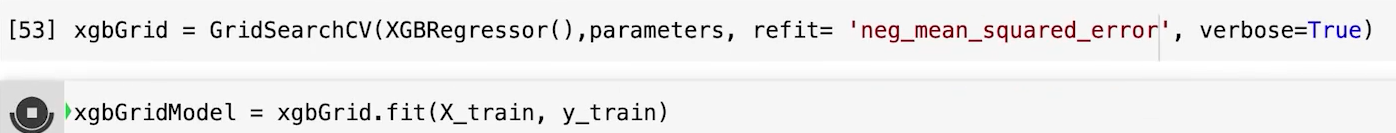

In [25]:
#TIVE QUE REALIZAR Downgrade do scikit-learn para uma versão compatível.
#A versão 1.2.2 do scikit-learn é amplamente compatível com o XGBRegressor. Execute o comando abaixo para fazer o downgrade e resolver o problema:

!pip install scikit-learn==1.2.2

In [32]:
xgbGridModel = xgbGrid.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [33]:
#melhor combinação após teste
xgbGridModel.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_jobs': 5,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [34]:
#PREVISÃO DOS PREÇOS DAS CASAS USANDO AS CARACTERISTICAS X, COM A MELHOR COMBINAÇÃO DE HYPERPARAMETROS
yGrid = xgbGridModel.predict(X_test)

In [39]:
MSEGrid = mean_squared_error(y_test, yGrid)
print('MSE XGB Grid:' ,MSEGrid)
RMSEGrid = np.sqrt(MSEGrid)
print('RME XGB Grid:', RMSEGrid)

MSE XGB Grid: 8.2975112347883
RME XGB Grid: 2.8805400942858443
